In [4]:
import numpy as np
import xarray as xr
import dask.array as da
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [5]:
ds = xr.open_dataset("../data/critical_3d.nc")

nmodes = 4
modes = np.int64(np.unique(ds['mode'].values))[0:nmodes]

ds

<xarray.Dataset>
Dimensions:  (α: 400, β: 400, γ: 400)
Coordinates:
  * α        (α) float64 -2.75 -2.746 -2.742 -2.738 ... -1.212 -1.208 -1.204
  * β        (β) float64 0.0 0.00525 0.0105 0.01575 ... 2.079 2.084 2.09 2.095
  * γ        (γ) float64 0.0 0.0055 0.011 0.0165 ... 2.178 2.183 2.189 2.195
Data variables:
    match    (α, β, γ) float64 ...
    Q        (α, β, γ) float64 ...
    mode     (α, β, γ) float64 0.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0

In [7]:
tol = 0.25
mode_list = []

for mode in modes:
    print(mode, end=", ")
    mode_list.append(ds['match'].where((ds['mode'] == mode) & (np.abs(ds['match'] - 1.) < tol)))
    
modal = xr.concat(mode_list, dim='mode')
modal = modal.assign_coords({'mode': modes})

0, 1, 2, 3, 

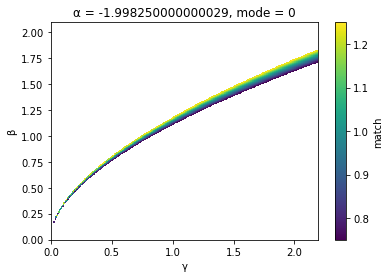

In [12]:
modal.sel(mode=0).sel(α=-2., method='nearest').plot()